In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_loan=pd.read_csv('loan.csv')

Analzying raw data check for first 5 rows

In [3]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
null_columns=df_loan.isnull().sum()

null_columns=null_columns[null_columns>0]
print("Below columns have ",null_columns)

Below columns have  emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64


In [5]:
df_loan.dropna(axis=1,how='all',inplace=True)

In [6]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [7]:
df_loan.shape

(39717, 57)

Payment plan has only n value in it
initial_list_status- has single value F
$$$$last_credit_pull_d  - check otherwise drop
collections_12_mths_ex_med- 0,NA only
policy_code- value of 1 only 
application_type- only Indi value present
acc_now_delinq-Only 0
chargeoff_within_12_mths- only 0 and NA
delinq_amnt-only 0
tax_liens- 0 and NA only

In [8]:
df_loan.drop(['id','emp_title','pymnt_plan', 'url','desc','title','initial_list_status','next_pymnt_d','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','last_pymnt_d'],axis=1,inplace=True)

In [9]:
df_loan.shape

(39717, 42)

In [10]:
df_loan.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,...,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260
std,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,...,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324
min,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,...,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,...,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,...,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,...,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [11]:
df_loan['revol_util'].describe()

count     39667
unique     1089
top          0%
freq        977
Name: revol_util, dtype: object

In [12]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   member_id                39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [13]:
df_loan.isnull().sum()

member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
out_prncp                      0
out_prncp_

Dropping columns having more than 40% of null values

In [14]:
df_loan.drop(['mths_since_last_delinq','mths_since_last_record'],axis=1,inplace=True)

In [15]:
df_loan['emp_length']=df_loan['emp_length'].str.replace("years","")
df_loan['emp_length']=df_loan['emp_length'].str.replace("year","")
df_loan['emp_length']=df_loan['emp_length'].str.replace("< 1","0")
df_loan['emp_length']=df_loan['emp_length'].str.replace(r'(^.*10+.*$)', '10')


In [16]:
df_loan['emp_length'].value_counts()

10    8879
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [17]:
df_loan['emp_length'].fillna(df_loan['emp_length'].median(),inplace=True)

In [18]:
df_loan.isnull().sum()

member_id                    0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                  50
total_acc                    0
out_prncp                    0
out_prncp_inv                0
total_pymnt                  0
total_pymnt_inv              0
total_rec_prncp              0
total_re

In [19]:
df_loan['revol_util']=df_loan['revol_util'].str.replace("%","")


In [20]:
df_loan['revol_util'].astype(float)

0        83.7
1         9.4
2        98.5
3        21.0
4        53.9
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 39717, dtype: float64

In [21]:
df_loan.dropna(subset=['revol_util'],inplace=True,axis=0)

In [32]:
df_loan.isnull().sum()

member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
zip_code                    0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
out_prncp                   0
out_prncp_inv               0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
total_rec_

In [31]:
df_loan.dropna(subset=['last_credit_pull_d'],axis=0,inplace=True)

In [33]:
df_loan['pub_rec_bankruptcies'].fillna(0,inplace=True)


In [36]:
df_loan.shape

(39665, 40)

In [37]:
cat_cols=["term","grade","sub_grade","emp_title","home_ownership","verification_status","issue_d","loan_status","purpose","title","zip_code","addr_state"]
num_cols=["loan_amnt","funded_amnt","funded_amnt_inv","installment","annual_inc","total_acc","total_pymnt","total_pymnt_inv","total_rec_int","total_rec_late_fee","total_rec_prncp"]

In [41]:
cat_tushar=["loan_status","purpose","title","zip_code","addr_state"]
num_tushar=["total_pymnt","total_pymnt_inv","total_rec_int","total_rec_late_fee","total_rec_prncp"]

In [40]:
df_loan.duplicated().sum()

0

In [42]:
df_loan['loan_status'].value_counts()

Fully Paid     32915
Charged Off     5610
Current         1140
Name: loan_status, dtype: int64

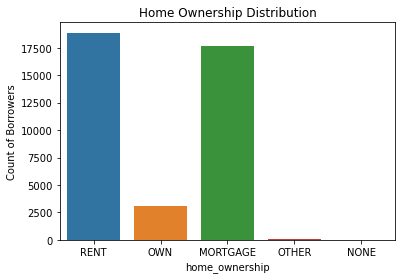

In [43]:
sns.countplot(x=df_loan['home_ownership'])
plt.title('Home Ownership Distribution')
plt.ylabel('Count of Borrowers')
plt.show()


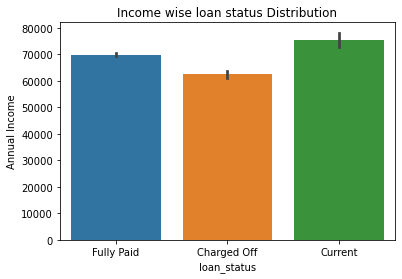

In [44]:
sns.barplot(x=df_loan['loan_status'],y=df_loan['annual_inc'])
plt.title('Income wise loan status Distribution')
plt.ylabel('Annual Income')
plt.show()


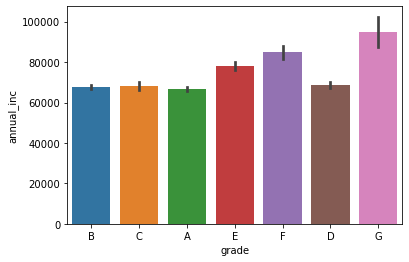

In [45]:
sns.barplot(x=df_loan['grade'],y=df_loan['annual_inc'])
plt.show()


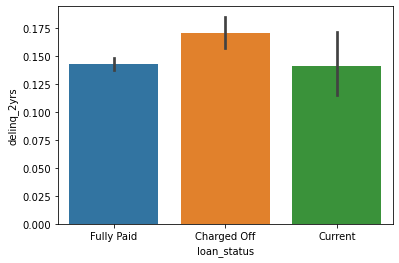

In [46]:
sns.barplot(x=df_loan['loan_status'],y=df_loan['delinq_2yrs'])
plt.show()


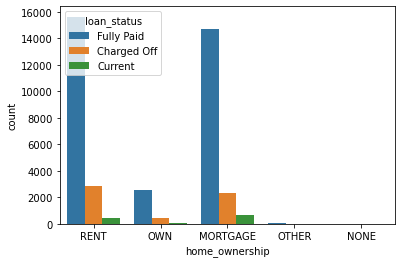

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='home_ownership', hue='loan_status', data=df_loan)
plt.show()

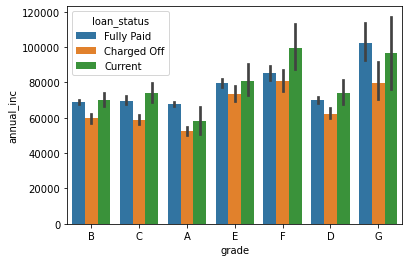

In [49]:
sns.barplot(x=df_loan['grade'],y=df_loan['annual_inc'],hue=df_loan['loan_status'])
plt.show()

In [ ]:
#sns.barplot(y=df['purpose'],x=df['loan_amnt'])
#plt.show()

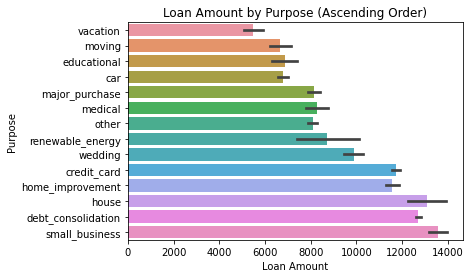

In [51]:
order = df_loan.groupby('purpose')['loan_amnt'].median().sort_values().index

# Plot the horizontal bar plot
sns.barplot(y=df_loan['purpose'], x=df_loan['loan_amnt'], order=order)
plt.xlabel('Loan Amount')
plt.ylabel('Purpose')
plt.title('Loan Amount by Purpose (Ascending Order)')
plt.show()

In [52]:
verification_count=df_loan.groupby(['verification_status','member_id']).nunique()


In [ ]:
df_loan['loan_status'].value_counts()

In [53]:
loan_status_per=df_loan['loan_status'].value_counts(normalize=True)*100

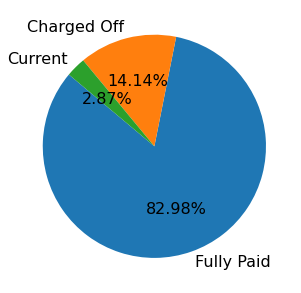

In [54]:
plt.figure(figsize=(5,6))
plt.pie(loan_status_per, autopct='%1.2f%%',labels=loan_status_per.index, startangle=140,textprops={'fontsize': 16})
plt.show()


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

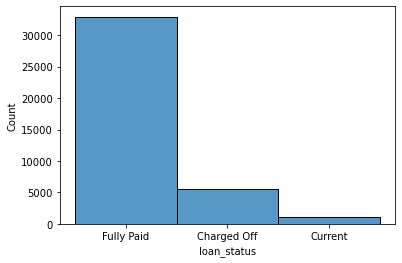

In [55]:
sns.histplot(data=df_loan,x='loan_status')

<AxesSubplot:xlabel='verification_status', ylabel='Count'>

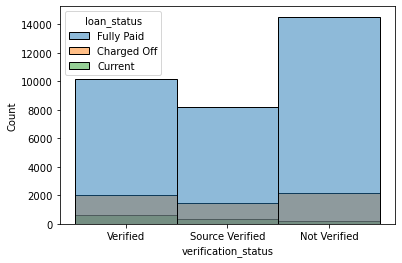

In [56]:
sns.histplot(data=df_loan,x='verification_status',hue='loan_status')

<AxesSubplot:xlabel='verification_status', ylabel='count'>

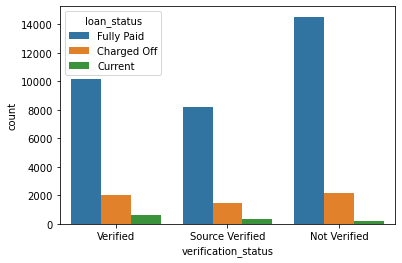

In [57]:
sns.countplot(data=df_loan,x='verification_status',hue='loan_status')

In [ ]:
#sns.barplot(x=verification_count.index,y=verification_count.values,palette="pastel")

#plt.xlabel('Verification Status')
#plt.ylabel('Number of Unique Users')
#plt.title('Number of Unique Users by Verification Status')
#plt.show()

In [59]:
df_filter=df_loan[df_loan['loan_status'] != 'Current']

In [60]:
df_filter.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,0,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0
2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0
5,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0
